## **4. Project Workflow**

### **Step 1: Importing Libraries & Load Dataset**

Start by **importing** the necessary Python libraries and loading the dataset.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 # Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/anmoljaincma/project_3_internship_unified_mentor/refs/heads/main/OCD%20Patient%20Dataset_%20Demographics%20%26%20Clinical%20Data%20-%20OCD%20Patient%20Dataset_%20Demographics%20%26%20Clinical%20Data.csv')

In [ ]:
df.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


### **Step 2: Initial Data Exploration**

**Explore the dataset** to understand its structure, check for missing values, and get an overview of the data

In [ ]:
# Get a summary of the dataset
print(df.info())
 # Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

Based on the initial data exploration, here are some inferences:

- The dataset contains 1500 entries and 17 columns.
- Most columns have no missing values.
- The columns '**Previous Diagnoses**' and '**Medications**' have missing values (248 and 386 respectively).
- The data types are a mix of integers (int64) and objects (object).

###**Step 3: Descriptive Statistics**

Calculate basic statistics to understand the distribution of numerical columns.

In [ ]:
# Summary statistics for numerical columns
print(df.describe())

        Patient ID          Age  Duration of Symptoms (months)  \
count  1500.000000  1500.000000                    1500.000000   
mean   5541.254000    46.781333                     121.745333   
std    2562.389469    16.830321                      67.404610   
min    1017.000000    18.000000                       6.000000   
25%    3338.000000    32.000000                      64.000000   
50%    5539.500000    47.000000                     121.000000   
75%    7745.500000    61.000000                     178.000000   
max    9995.000000    75.000000                     240.000000   

       Y-BOCS Score (Obsessions)  Y-BOCS Score (Compulsions)  
count                1500.000000                  1500.00000  
mean                   20.048000                    19.62600  
std                    11.823884                    11.78287  
min                     0.000000                     0.00000  
25%                    10.000000                     9.00000  
50%                    20.0

Okay, let's analyze the `df.describe()` output. This output provides a summary of the central tendency, dispersion, and shape of the distribution of the numerical columns in your dataset.

Here's what we can infer from the descriptive statistics:

- **Patient ID:** This is likely a unique identifier and the statistics here are not particularly meaningful for analysis, other than confirming the count is 1500.
- **Age:** The **average age** of patients in the dataset is approximately **46.78 years**, with a **standard deviation** of about **16.83**. The age ranges from **18 to 75**. The median age (50th percentile) is 47, which is very close to the mean, suggesting a relatively **symmetrical distribution** of age.
- **Duration of Symptoms (months):** On average, patients have had symptoms for about **121.75 months** (roughly 10 years). The duration ranges from **6 months to 240 months** (20 years). The **standard deviation** is around **67.40 months**, indicating a significant spread in the duration of symptoms. The **median** is **121 months**, also close to the mean.
- **Y-BOCS Score (Obsessions):** The **mean** Y-BOCS score for obsessions is about **20.05**, with a **standard deviation** of **11.82**. Scores range from 0 to 40. The median is 20, again close to the mean. The interquartile range (IQR) from 10 to 31 suggests that the middle 50% of scores fall within this range.
- **Y-BOCS Score (Compulsions):** The **mean** Y-BOCS score for compulsions is approximately **19.63**, with a **standard deviation** of **11.78**. Scores also range from 0 to 40. The median is 20, very close to the mean and the median for obsessions. The IQR for compulsions is from 9 to 29.

In summary, the descriptive statistics provide a good initial understanding of the typical patient in this dataset in terms of age and symptom duration, as well as the distribution of their Y-BOCS scores for both obsessions and compulsions. The **means and medians for these numerical columns are quite close**, suggesting that these distributions are not heavily skewed.



In [ ]:
# Summary statistics for categorical columns
print(df.describe(include=['O']))

       Gender  Ethnicity Marital Status Education Level OCD Diagnosis Date  \
count    1500       1500           1500            1500               1500   
unique      2          4              3               4               1218   
top      Male  Caucasian         Single    Some College         2017-06-21   
freq      753        398            511             394                  4   

       Previous Diagnoses Family History of OCD Obsession Type  \
count                1252                  1500           1500   
unique                  4                     2              5   
top                   MDD                   Yes   Harm-related   
freq                  345                   760            333   

       Compulsion Type Depression Diagnosis Anxiety Diagnosis     Medications  
count             1500                 1500              1500            1114  
unique               5                    2                 2               3  
top            Washing                

Okay, let's analyze the output from `df.describe(include=['O'])`. This provides a summary of the categorical columns in your dataset.

Here's what we can infer:

- **Gender:** There are 2 unique values (Male and Female). The top value is Male, with a frequency of 753, indicating a nearly equal distribution of genders in the dataset.
- **Ethnicity:** There are 4 unique values. The top value is Caucasian, with a frequency of 398.
- **Marital Status:** There are 3 unique values. The top value is Single, with a frequency of 511.
- **Education Level:** There are 4 unique values. The top value is Some College, with a frequency of 394.
- **OCD Diagnosis Date:** There are 1218 unique dates, with the most frequent date being 2017-06-21, appearing 4 times. This suggests that diagnosis dates are quite varied.
- **Previous Diagnoses:** There are 4 unique values, with the most frequent being MDD (Major Depressive Disorder), appearing 345 times. This column has missing values as noted earlier.
- **Family History of OCD:** There are 2 unique values (Yes and No). The top value is Yes, with a frequency of 760, indicating that a slight majority of patients have a family history of OCD.
- **Obsession Type:** There are 5 unique values, with the most frequent being Harm-related, appearing 333 times.
- **Compulsion Type:** There are 5 unique values, with the most frequent being Washing, appearing 321 times.
- **Depression Diagnosis:** There are 2 unique values (Yes and No). The top value is Yes, with a frequency of 772, indicating that a majority of patients also have a depression diagnosis.
- **Anxiety Diagnosis:** There are 2 unique values (Yes and No). The top value is Yes, with a frequency of 751, indicating that a majority of patients also have an anxiety diagnosis.
- **Medications:** There are 3 unique values, with the most frequent being Benzodiazepine, appearing 386 times. This column also has missing values.

In summary, this output gives us a good understanding of the distribution and frequency of categories within each of the object type columns. We can see the most common categories for each variable and the number of unique values, which can be useful for further analysis and visualization.

###**Step 4: Visualizing Demographic Data**

Create visualizations to explore the demographic data (Age, Gender, Ethnicity,
 etc.).

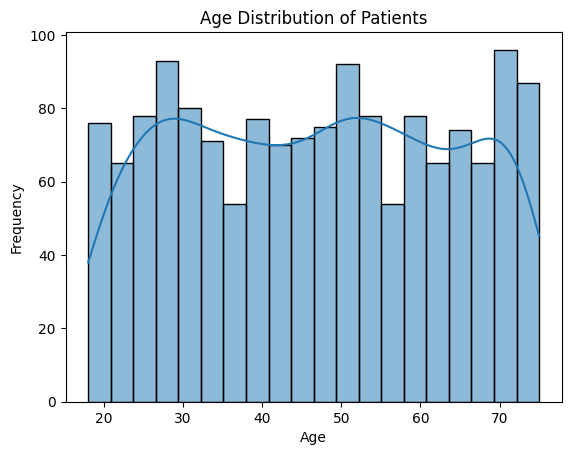

In [ ]:
# Age distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of age among the patients in the dataset. Here are some observations:

- The age distribution appears to be somewhat **spread out**, with no single age group dominating.
- There seem to be peaks around the ages of **25-30**, **50-55**, and **70-75**, suggesting a higher frequency of patients in these age ranges.
- The distribution is **not perfectly symmetrical**; it shows some fluctuations across the age spectrum.
- The Kernel Density Estimate (KDE) line provides a smoothed representation of the distribution, highlighting the potential modes (peaks) in the data.

Overall, the histogram indicates that the patient ages are distributed across a wide range, with some notable concentrations in certain age groups.



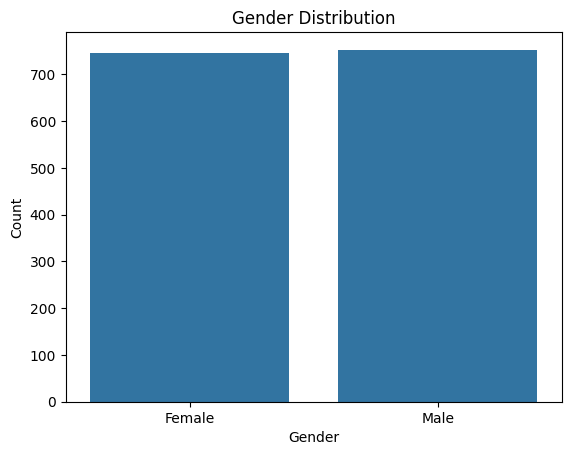

In [ ]:
# Gender distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The bar plot clearly shows the distribution of patients by gender. We can observe that:

There are two categories: **Female** and **Male**.
The counts for both Female and Male are very close to each other.
This indicates that the dataset has a **nearly equal** representation of male and female patients.

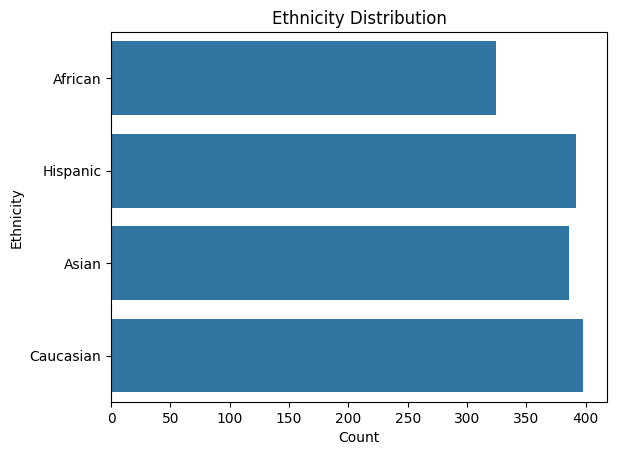

In [ ]:
# Ethnicity distribution
sns.countplot(y='Ethnicity', data=df)
plt.title('Ethnicity Distribution')
plt.xlabel('Count')
plt.ylabel('Ethnicity')
plt.show()

The bar plot shows the distribution of patients across different ethnic groups. Here's what we can see:

- There are four ethnic categories: Caucasian, Asian, Hispanic, and African.
- **Caucasian and Hispanic** groups appear to have the highest counts, being very close to each other.
- Asian also has a significant count, only slightly lower than Caucasian and Hispanic.
- **African** has the **lowest** count among the four groups.

This suggests that the dataset is primarily composed of patients from Caucasian, Hispanic, and Asian backgrounds, with fewer patients from the African ethnic group.

/tmp/ipython-input-258795059.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Marital Status', data=df, palette='cool')


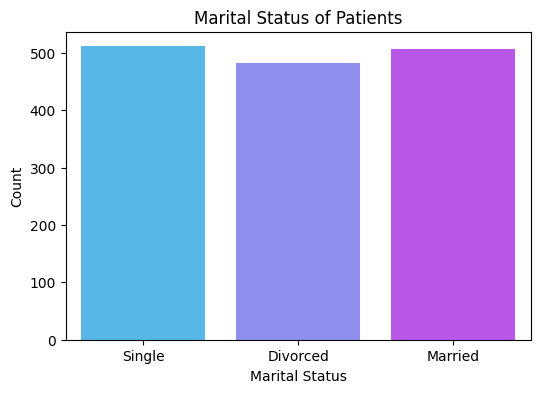

In [ ]:
# Marital Status
plt.figure(figsize=(6,4))
sns.countplot(x='Marital Status', data=df, palette='cool')
plt.title('Marital Status of Patients')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

The bar plot shows the distribution of patients across different marital statuses. Here's what we can see:

- There are three marital status categories: Single, Divorced, and Married.
- The counts for all three categories are quite similar, with Single and
Married having slightly higher counts than Divorced.

This indicates that the dataset has a relatively **even distribution** of patients across these three marital statuses.

/tmp/ipython-input-1667503459.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education Level', data=df, palette='Set2')


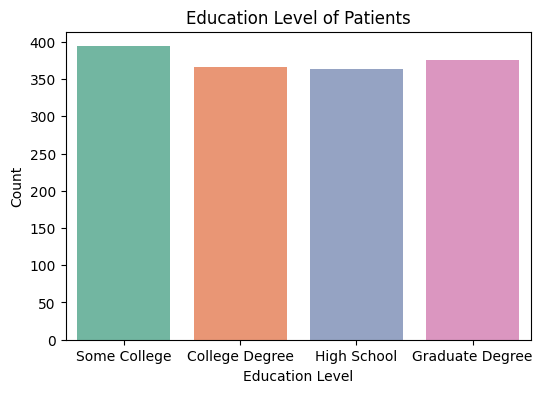

In [ ]:
# Education Level
plt.figure(figsize=(6,4))
sns.countplot(x='Education Level', data=df, palette='Set2')
plt.title('Education Level of Patients')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

The bar plot shows the distribution of patients across different education levels. Here's what we can see:

- There are four education levels: Some College, College Degree, High School, and Graduate Degree.
- The counts for all four categories are quite similar, with "**Some College**" having the highest count, followed closely by "Graduate Degree", "College Degree", and "High School".

This indicates that the dataset has a **relatively even distribution** of patients across these four education levels, with a slight prevalence of patients with "Some College" education.

###**Step 5: Clinical Data Analysis**

Analyze the clinical data (Duration of Symptoms, Y-BOCS Scores, etc.) to
 uncover patterns and insights.

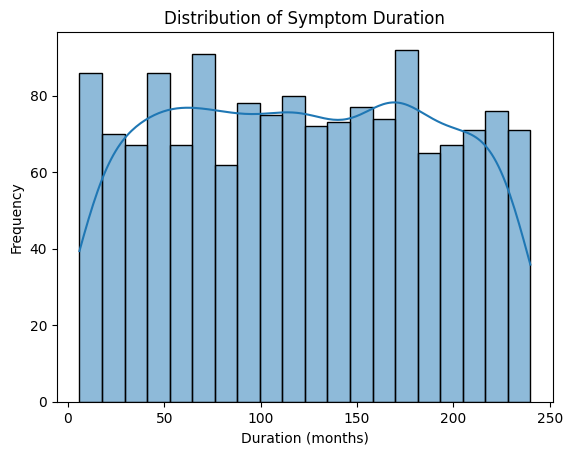

In [ ]:
# Distribution of symptom duration
sns.histplot(df['Duration of Symptoms (months)'], bins=20, kde=True)
plt.title('Distribution of Symptom Duration')
plt.xlabel('Duration (months)')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of the duration of symptoms in months among the patients. Here are some observations:

- The distribution appears to be somewhat spread out across the range of symptom durations.
- There **isn't a single dominant peak**, but rather several smaller peaks or concentrations of patients with symptom durations around certain values (e.g., around 25-50 months, 75-100 months, 175-200 months).
- The distribution is **not perfectly uniform or symmetrical**, showing variations in the frequency of different symptom durations.
- The KDE line provides a smoothed representation, suggesting a multi-modal distribution with several points of higher density.

Overall, the histogram indicates that patients in this dataset have a wide range of symptom durations, with some tendency for clustering around certain periods.

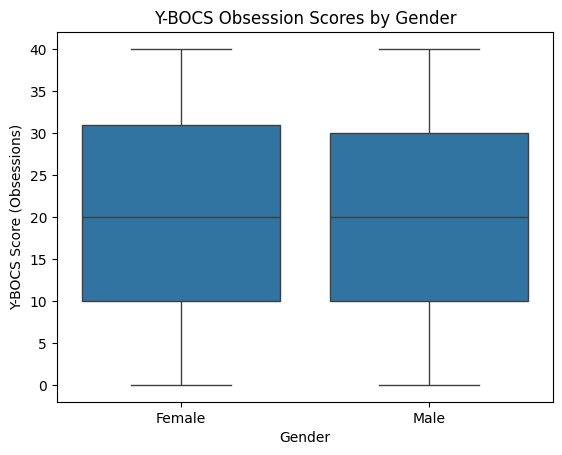

In [ ]:
# Boxplot of Y-BOCS Scores by Gender
sns.boxplot(x='Gender', y='Y-BOCS Score (Obsessions)', data=df)
plt.title('Y-BOCS Obsession Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Y-BOCS Score (Obsessions)')
plt.show()

Let's analyze the boxplot showing the Y-BOCS obsession scores by gender.

The boxplot visualizes the distribution of Y-BOCS Obsession scores for both male and female patients. Here's what we can infer:

- **Median:** The median Y-BOCS obsession scores for both genders appear to be very similar, both around 20. This is represented by the line within the box.
- **Interquartile Range (IQR):** The box represents the IQR (the middle 50% of the data). The size of the boxes for both genders is also quite similar, suggesting a similar spread of scores for the middle half of the patients in each group.
- **Whiskers:** The whiskers extend from the box to the minimum and maximum values within 1.5 times the IQR. The length of the whiskers is comparable for both genders, indicating a similar range of scores outside the IQR.
- **Outliers:** There do not appear to be any significant outliers in either gender's distribution of Y-BOCS obsession scores, as indicated by the lack of individual points beyond the whiskers.

In summary, the boxplot suggests that there is **no substantial difference** in the distribution of Y-BOCS obsession scores between male and female patients in this dataset. The median, spread, and range of scores are quite similar for both genders.


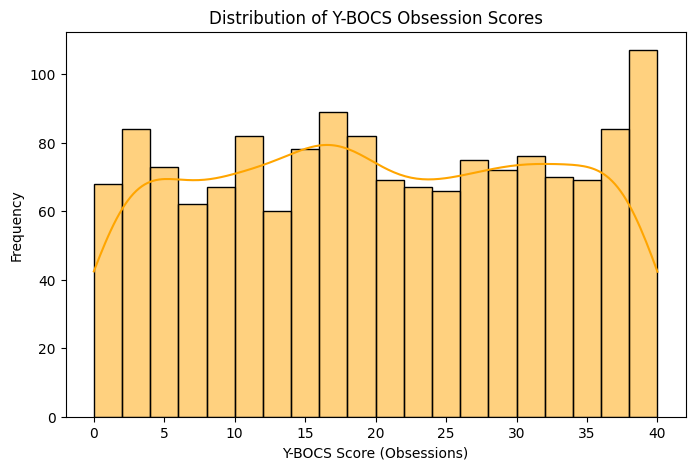

In [ ]:
# Y‑BOCS Scores (Severity of OCD)
plt.figure(figsize=(8,5))
sns.histplot(df['Y-BOCS Score (Obsessions)'], bins=20, kde=True, color='orange')
plt.title('Distribution of Y-BOCS Obsession Scores')
plt.xlabel('Y-BOCS Score (Obsessions)')
plt.ylabel('Frequency')
plt.show()

This histogram shows the distribution of Y-BOCS Obsession Scores. Here's what we can see:

- The scores are distributed across the entire range from 0 to 40.
- There are several peaks in the distribution, suggesting that certain score ranges are more common among patients. **Notable peaks** appear around scores of **5, 18, and 40**.
- The distribution is *not symmetrical*, with a higher frequency of scores towards the higher end of the scale (around 40).

Overall, the histogram indicates that there is a wide range of Y-BOCS Obsession Scores among the patients, with some scores being more prevalent than others, particularly higher scores.



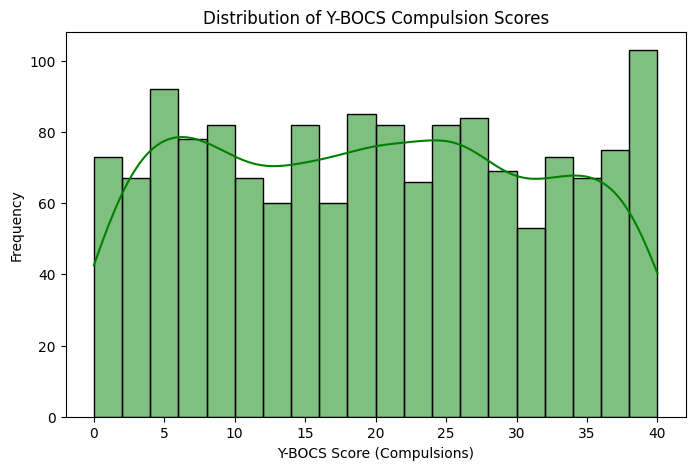

In [ ]:
# Y-BOCS Score(Compulsions)
plt.figure(figsize=(8,5))
sns.histplot(df['Y-BOCS Score (Compulsions)'], bins=20, kde=True, color='green')
plt.title('Distribution of Y-BOCS Compulsion Scores')
plt.xlabel('Y-BOCS Score (Compulsions)')
plt.ylabel('Frequency')
plt.show()

This histogram shows the distribution of Y-BOCS Compulsion Scores. Here's what we can see:

- The scores are distributed across the entire range from 0 to 40, similar to the obsession scores.
- There are also multiple peaks in this distribution, with notable concentrations around scores of **5, 20, and 40**.
- Similar to the obsession scores, the distribution is *not perfectly symmetrical*, with a tendency for higher frequencies at certain score ranges, particularly around 40.

Overall, the histogram indicates a wide range of Y-BOCS Compulsion Scores among the patients, with certain scores being more common. There are some similarities in the shape of the distributions for both obsession and compulsion scores, particularly the peak around 40.



/tmp/ipython-input-2540477719.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Obsession Type', data=df, order=df['Obsession Type'].value_counts().index, palette='coolwarm')


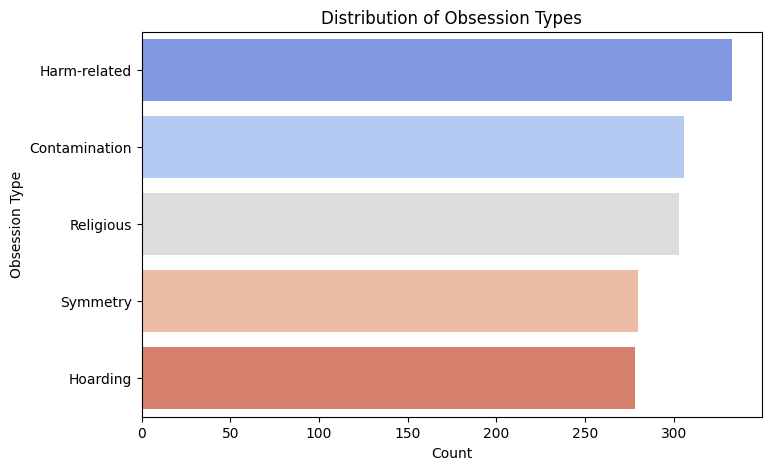

/tmp/ipython-input-2540477719.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Compulsion Type', data=df, order=df['Compulsion Type'].value_counts().index, palette='Blues')


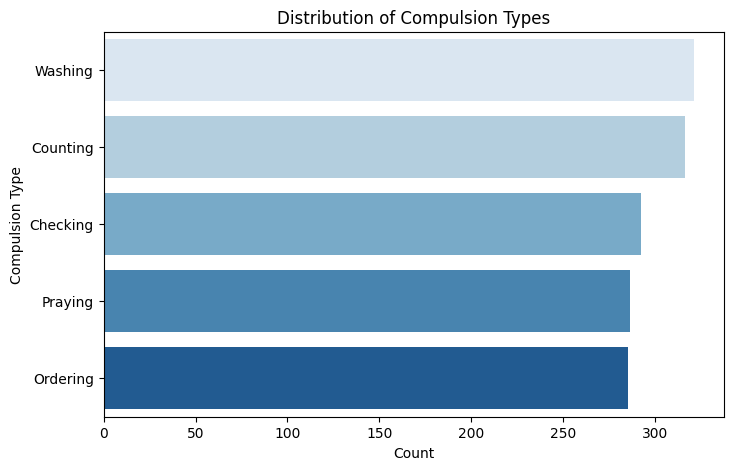

In [ ]:
# Obsession & Compulsion Types
plt.figure(figsize=(8,5))
sns.countplot(y='Obsession Type', data=df, order=df['Obsession Type'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Obsession Types')
plt.xlabel('Count')
plt.ylabel('Obsession Type')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(y='Compulsion Type', data=df, order=df['Compulsion Type'].value_counts().index, palette='Blues')
plt.title('Distribution of Compulsion Types')
plt.xlabel('Count')
plt.ylabel('Compulsion Type')
plt.show()

Let's analyze the two bar plots showing the distribution of Obsession Types and Compulsion Types.

**Distribution of Obsession Types:**

This bar plot shows the frequency of different obsession types among the patients.

- The most common obsession type is **Harm-related**.
- **Contamination** is the second most frequent obsession type.
- **Religious, Symmetry, and Hoarding** related obsessions occur with similar, lower frequencies compared to Harm-related and Contamination.

**Distribution of Compulsion Types:**

This bar plot shows the frequency of different compulsion types.

- The most common compulsion type is **Washing**.
- **Counting, Checking, Praying, and Ordering** occur with similar frequencies, following Washing.

In summary, these plots highlight the most prevalent types of obsessions and compulsions in the dataset, which can be valuable for understanding the common manifestations of OCD in this patient population.

/tmp/ipython-input-1640016738.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Medications_plot', data=df, palette='Set1',


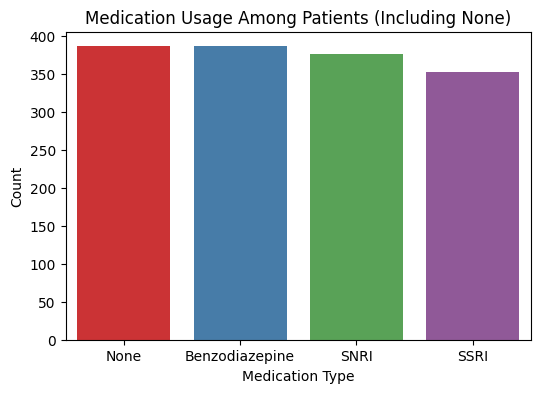

In [ ]:
# Medications
# Create a temporary column for visualization
df['Medications_plot'] = df['Medications'].fillna('None')

plt.figure(figsize=(6,4))
sns.countplot(x='Medications_plot', data=df, palette='Set1',
              order=df['Medications_plot'].value_counts().index)
plt.title('Medication Usage Among Patients (Including None)')
plt.xlabel('Medication Type')
plt.ylabel('Count')
plt.show()

# Drop the temporary column after plotting
df = df.drop(columns=['Medications_plot'])

This bar plot shows the distribution of medication usage among patients, including those for whom medication information is missing ('None').

- The category "**None**" has the highest count, indicating that a significant portion of the dataset has missing information regarding medications.
- Among the recorded medications, **Benzodiazepine** has the highest count, followed closely by **SNRI**, and then **SSRI**.

This analysis highlights that while the three listed medication types are used, a substantial number of patients in this dataset do not have their medication information recorded. This missing data in the 'Medications' column is something to be aware of for further analysis.

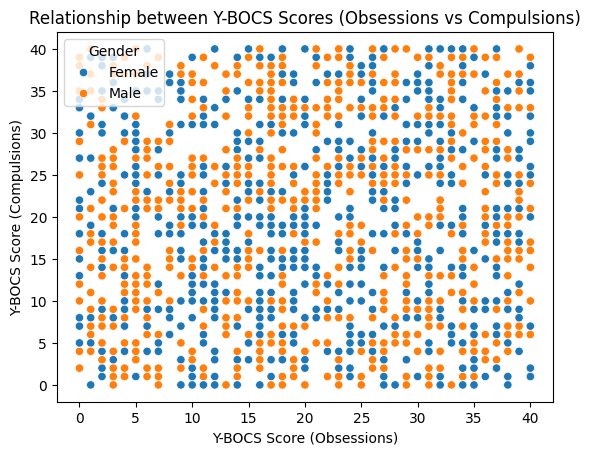

In [ ]:
# Relationship between Obsession and Compulsion Y-BOCS Scores
sns.scatterplot(x='Y-BOCS Score (Obsessions)', y='Y-BOCS Score (Compulsions)', hue='Gender', data=df)
plt.title('Relationship between Y-BOCS Scores (Obsessions vs Compulsions)')
plt.xlabel('Y-BOCS Score (Obsessions)')
plt.ylabel('Y-BOCS Score (Compulsions)')
plt.show()

Let's analyze the scatter plot you provided showing the relationship between Y-BOCS Obsession Scores and Y-BOCS Compulsion Scores, with points colored by Gender.

Here's what we can infer from this visualization:

- **Overall Relationship:** The scatter plot shows a general trend where higher Y-BOCS Obsession scores tend to be associated with higher Y-BOCS Compulsion scores. The points are scattered across the plot, but there's a visible **positive correlation**, meaning as one score increases, the other also tends to increase. This is expected, as both scores are measures of OCD severity.
- **Distribution:** The points appear to be distributed across the entire range of scores for both obsessions and compulsions (from 0 to 40). There isn't a clear clustering of points in any specific area, suggesting a **wide range of symptom severity** among the patients.
- **Gender:** The points are colored to distinguish between Female (blue) and Male (orange) patients. By observing the distribution of colors, we can see that both genders are present across the entire range of scores. There doesn't appear to be a distinct pattern or separation of points based on gender, suggesting that the relationship between obsession and compulsion scores is **similar for both male and female patients** in this dataset. The overlap of the blue and orange points throughout the scatter plot reinforces the earlier observation from the boxplot that there isn't a significant difference in Y-BOCS scores between genders.

In summary, the scatter plot illustrates a positive relationship between the severity of obsessions and compulsions, and this relationship appears to be consistent across both genders in the dataset.

/tmp/ipython-input-3623853262.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medications_plot', y='Y-BOCS Score (Obsessions)', data=df, palette='Set2')


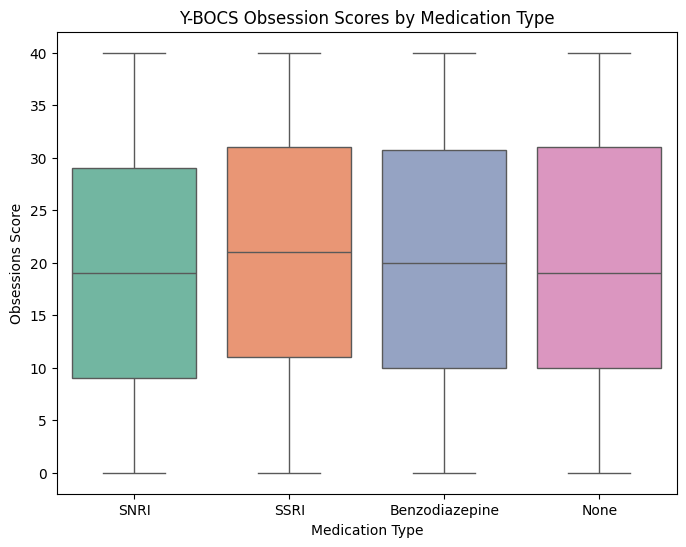

/tmp/ipython-input-3623853262.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medications_plot', y='Y-BOCS Score (Compulsions)', data=df, palette='Set2')


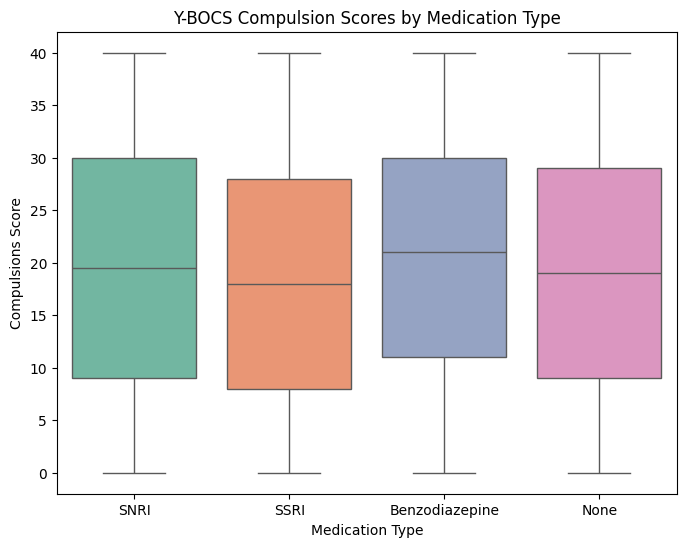

In [22]:
# Relation of Medications with OCD severity of OCD symptoms
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy replacing NaN with 'None'
df['Medications_plot'] = df['Medications'].fillna('None')

plt.figure(figsize=(8,6))
sns.boxplot(x='Medications_plot', y='Y-BOCS Score (Obsessions)', data=df, palette='Set2')
plt.title('Y-BOCS Obsession Scores by Medication Type')
plt.xlabel('Medication Type')
plt.ylabel('Obsessions Score')
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='Medications_plot', y='Y-BOCS Score (Compulsions)', data=df, palette='Set2')
plt.title('Y-BOCS Compulsion Scores by Medication Type')
plt.xlabel('Medication Type')
plt.ylabel('Compulsions Score')
plt.show()

Let's analyze the two boxplots showing the distribution of Y-BOCS Obsession and Compulsion scores across different medication types (SNRI, SSRI, and Benzodiazepine).

**Y-BOCS Obsession Scores by Medication Type:**

*   **Medians:** The **median Y-BOCS Obsession scores** appear to be **relatively similar across the three medication types**, all falling roughly around 20.
*   **Interquartile Range (IQR):** The boxes (representing the IQR) for all three medication types are also **quite similar in size**, suggesting a comparable spread of the middle 50% of obsession scores for patients on these medications.
*   **Whiskers:** The range of scores within the whiskers appears **broadly similar across the groups**.
*   **Overall:** Based on this boxplot, there **doesn't seem to be a dramatic difference** in the distribution of Y-BOCS Obsession scores among patients taking SNRI, SSRI, or Benzodiazepine medications.

**Y-BOCS Compulsion Scores by Medication Type:**

*   **Medians:** Similar to the obsession scores, the **median Y-BOCS Compulsion scores** are also **quite close across the three medication types**, around 18-20.
*   **Interquartile Range (IQR):** The size of the boxes (IQR) for compulsion scores is also **comparable across SNRI, SSRI, and Benzodiazepine**, indicating a similar spread for the middle half of the compulsion scores in each group.
*   **Whiskers:** The range of compulsion scores within the whiskers is also **broadly similar across the three medication types**.
*   **Overall:** This boxplot suggests that the distribution of Y-BOCS Compulsion scores is likewise **quite similar for patients on SNRI, SSRI, and Benzodiazepine** medications.

**Summary of Both Boxplots:**

Both boxplots indicate that, in this dataset, there **isn't a clear and substantial difference** in the distribution of either Y-BOCS Obsession or Compulsion scores based on whether patients are taking SNRI, SSRI, or Benzodiazepine. The median scores, spread (IQR), and overall range of scores appear **quite similar across these medication types**.

It's important to remember that this analysis is based on the distributions shown in the boxplots and doesn't account for other factors that might influence Y-BOCS scores or medication effectiveness.

###**Step 6: Correlation Analysis**

Examine the correlation between numerical variables, such as Age, Duration of Symptoms, Y-BOCS Scores, etc.

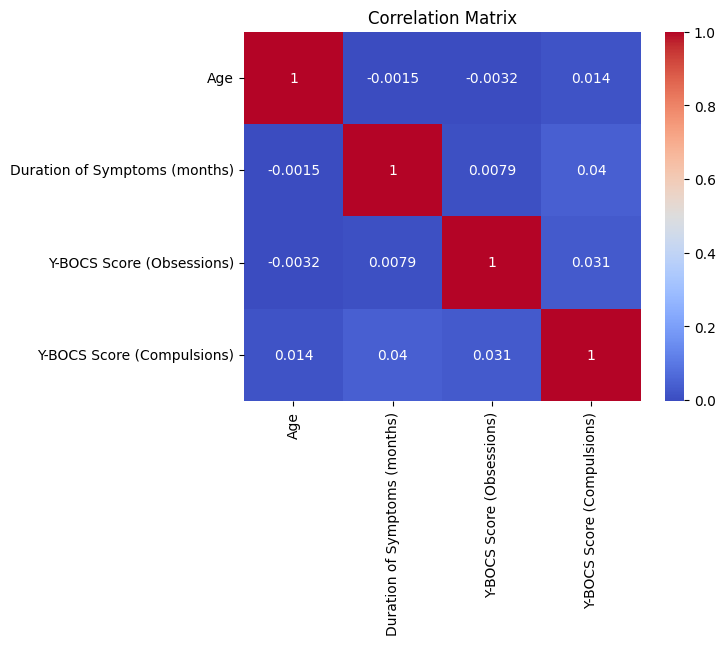

In [ ]:
# Correlation matrix
corr_matrix = df[['Age', 'Duration of Symptoms (months)','Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The heatmap displays the correlation coefficients between the numerical columns: 'Age', 'Duration of Symptoms (months)', 'Y-BOCS Score (Obsessions)', and 'Y-BOCS Score (Compulsions)'. The color intensity and the values in each cell indicate the strength and direction of the correlation.

Here's what we can infer:

- **Diagonal:** The diagonal of the heatmap shows a correlation of 1.0 for each variable with itself, which is expected.
- **Y-BOCS Scores (Obsessions and Compulsions):** There is a positive correlation between 'Y-BOCS Score (Obsessions)' and 'Y-BOCS Score (Compulsions)', with a coefficient of approximately **0.031**. This indicates a very **weak positive linear relationship**. While statistically positive, this low value suggests that while higher obsession scores tend to be associated with higher compulsion scores, the relationship is not strong in this dataset. This aligns with the scatter plot observation that showed a general trend but with considerable scatter.
- **Age and Duration of Symptoms:** The correlation between 'Age' and 'Duration of Symptoms (months)' is very close to **0 (-0.0015)**, indicating essentially **no linear relationship** between a patient's age and how long they have had symptoms.
- **Other correlations:** The correlations between 'Age' and the Y-BOCS scores, and between 'Duration of Symptoms (months)' and the Y-BOCS scores are also very close to **0 (ranging from -0.0032 to 0.04)**. This suggests that in this dataset, a patient's age and the duration of their symptoms have **little to no linear relationship** with the severity of their obsessions or compulsions as measured by the Y-BOCS scores.

In summary, the heatmap reveals that among the numerical variables examined, only the Y-BOCS scores for obsessions and compulsions show a weak positive correlation. Age and the duration of symptoms appear to have very little linear correlation with each other or with the Y-BOCS scores in this dataset.



###**Step 7: Key Insights and Reporting**

Based on the data exploration and analysis, here are some **key insights**:

- The dataset has a **nearly equal distribution of male and female** patients, and a relatively even distribution across marital statuses and education levels.
- The most prevalent ethnic groups in the dataset are **Caucasian, Hispanic, and Asian**.
- The age distribution is spread out with some concentrations in certain age groups (**25-30, 50-55, 70-75**).
- Symptom duration varies widely among patients, with no single dominant peak.
- **Harm-related and Contamination** are the most common obsession types, while Washing is the most common compulsion type.
- There is a **weak positive correlation** between Y-BOCS Obsession and Compulsion scores.
- Age and symptom duration show **very little linear correlation** with each other or with Y-BOCS scores.
- A significant portion of **medication information is missing** in the dataset.

**Reporting**

This analysis was compiled into:

- **Visual dashboards** (age, gender, obsession/compulsion types, medications).

- **Correlation heatmaps** to identify relationships among clinical features.

- **Summary tables** highlighting key demographics and treatment distributions.

These insights provide a **comprehensive view of OCD patient demographics**, symptom patterns, and treatment trends, which can assist in **clinical decision-making** and **future predictive modeling**.

##**5. Conclusion & Recommendations**

Based on the exploration and analysis of the OCD patient dataset, here are the key conclusions and recommendations:

**Key Conclusions:**

*   **Patient Demographics:** The dataset shows a **balanced distribution of genders** and a **relatively even spread across marital statuses and education levels**. The most represented ethnic groups are **Caucasian, Hispanic, and Asian**.
*   **Age and Symptom Duration:** Patient ages are distributed across a wide range with some concentrations, and symptom duration varies significantly, indicating a diverse patient population in terms of these factors.
*   **Symptom Patterns:** **Harm-related and Contamination** are the most frequent obsession types, while **Washing** is the most common compulsion type. This highlights the prevalent symptom presentations in this dataset.
*   **Y-BOCS Scores:** There is a **weak positive correlation** between Y-BOCS Obsession and Compulsion scores, suggesting that while related, the severity of obsessions and compulsions can vary somewhat independently.
*   **Limited Correlation with Age and Duration:** Age and the duration of symptoms show **very little linear correlation** with the severity of obsessions or compulsions (Y-BOCS scores).
*   **Medication Analysis:** The boxplots suggest **no substantial difference** in the distribution of Y-BOCS Obsession or Compulsion scores across the SNRI, SSRI, and Benzodiazepine medication types in this dataset.
*   **Missing Medication Data:** A **significant amount of medication information is missing**, which is a crucial factor to consider when interpreting analyses related to medications.

**Recommendations for Future Analysis:**

*   **Address Missing Data:** Explore methods to **handle the missing data** in the 'Previous Diagnoses' and 'Medications' columns, perhaps through imputation or by analyzing patterns in missingness.
*   **Temporal Analysis:** Investigate trends related to the 'OCD Diagnosis Date' by converting it to a datetime format and analyzing diagnoses over time or in relation to other variables.
*   **In-depth Relationship Exploration:** Further explore the relationships between demographic factors, clinical data, and treatment outcomes using more advanced statistical methods or visualizations.
*   **Severity-Based Analysis:** Categorize patients by OCD severity based on Y-BOCS scores and perform comparative analyses to understand the characteristics of different severity groups.
*   **Statistical Significance Testing:** Conduct appropriate statistical tests (e.g., ANOVA, t-tests) to determine if the observed differences in Y-BOCS scores or other numerical variables across categorical groups are statistically significant.
*   **Focus on Specific Subgroups:** Analyze specific subgroups of patients (e.g., by obsession or compulsion type) to identify unique characteristics or treatment responses within those groups.
*   **Predictive Modeling:** The cleaned and analyzed data can be used to build predictive models to understand factors influencing OCD severity, treatment response, or other clinical outcomes.

These conclusions provide a foundational understanding of the dataset, and the recommendations outline potential avenues for deeper analysis to gain more comprehensive insights into OCD patient characteristics and clinical patterns.

##**6. Tools & Libraries Used**

The following tools and libraries were used in this notebook:

- **Programming Language:** Python  
- **Libraries:** pandas, numpy, matplotlib, seaborn  
- **Platform:** Google Colab  
- **Version Control:** GitHub  
